In [ ]:
'''
Sample code to read dicom images and place slices as channels of RGB
'''
import matplotlib.pyplot as plt
import numpy as np
import os
import pydicom
from pydicom.data import get_testdata_files
from PIL import Image #for RGB manipulation
from medpy.io import load #for mha files

import SimpleITK as sitk  #for reading the MHA files
import pickle



def read_MHA(mha_full_file_path):
    #open the mha file
    itkimage = sitk.ReadImage(mha_full_file_path)
    #convert itkimage to 3D array
    mha_data = sitk.GetArrayFromImage(itkimage)
    # the code below is for write the 3D array to a output file
    return mha_data


def get_folders(partial_patient_directory,folder_dictionary,folder_key):
    print('----> folder_dictionary[fk][2] ', folder_dictionary[folder_key][2])
    full_name = os.path.join(partial_patient_directory, 
                             folder_dictionary[folder_key][2], 
                             'images')
    #full_name = os.path.join(clear_cell_top_dir,
    #                     clear_cell_dict[image1][3],
    #                     'images',
    #                     image1) #key, usually the patient folder
    print(full_name)
    return full_name

def make_RGB():
    for ii in range(0,len(position)-1):
    #slice = list(newpos.keys())[ii]
    #print(slice)
    #a = next(iter(newpos.values()))
    #print(a)
    
        slice = list(newpos.keys())[ii-1]
        print(slice)
        print(newpos[slice])
        full_file_r = os.path.join(dicom_dir, slice)
        slice = list(newpos.keys())[ii]
        full_file_g = os.path.join(dicom_dir, slice)
        slice = list(newpos.keys())[ii+1]
        full_file_b = os.path.join(dicom_dir, slice)

        #dicom_data_r = pydicom.dcmread(full_file_r)
        #dicom_data_g = pydicom.dcmread(full_file_g)
        #dicom_data_b = pydicom.dcmread(full_file_b)


        dicom_data_r = pydicom.dcmread(full_file_r)
        dicom_data_g = pydicom.dcmread(full_file_r)
        dicom_data_b = pydicom.dcmread(full_file_r)

        #(dicom_data.PixelData)
        #full_file = os.join(dicom_dir,ii)
        #dicom_data = pydicom.dcmread(full_file)
        # r, g, and b are 512x512 float arrays with values >= 0 and < 1.
        rgbArray = np.zeros((cols,rows,3), 'uint8')
        print(len(dicom_data_g.PixelData))

        #sample display of image
        #plt.figure()
        #plt.imshow(dicom_data_r.pixel_array,cmap='gray')

        rgbArray[:,:, 0] = dicom_data_r.pixel_array
        rgbArray[:,:, 1] = dicom_data_g.pixel_array
        rgbArray[..., 2] = dicom_data_b.pixel_array
        img = Image.fromarray(rgbArray)


        #setup an image subdirectory for each patient. The patient folder
        #is stored under the patient_directory list
        #output_image_dir is the main folder to store images, but must have folder for each 
        #patient created
        patient_image_folder = os.path.join(output_image_dir,patient_directories[0])
        rgb_file = os.path.join(output_image_dir, 'rgb' + str(ii) + '.png')
        print('rgb file is ',rgb_file)
        img.save(rgb_file)

        #position[ii]






#image_data, image_header = load('/path/to/image.mha')

filename = get_testdata_files("rtplan.dcm")[0]
ds = pydicom.dcmread(filename)  # plan dicom_data
ds.PatientName
setup_names = ds.dir("setup")

print(len(setup_names))
print(type(setup_names))
setup_names


#
#sample images
#
#/home/kgonzalez/CANCER_IMAGE_FILES/TEST_SET/NSCLC Radiogenomics-Demo/GSM714049/10-11-1990-PET CT LUNG CANCER-99045/2-CT Images-62820/

dicom_dir = '/home/kgonzalez/CANCER_IMAGE_FILES/TEST_SET/NSCLC Radiogenomics-Demo/GSM714049/10-11-1990-PET CT LUNG CANCER-99045/2-CT Images-62820/'

#output_image_dir = '/home/kgonzalez/COMSCI_168_SPRING_2019/Project/PROJECT_IMAGES'
output_image_dir = '/media/kgonzalez/Seagate Backup Plus Drive/RCC_IMAGES'


###########################################################################
# Dicom top level for RCC data. We will need to drill down into this to get the individual patient records
#
clear_cell_top_dir = '/media/kgonzalez/Seagate Backup Plus Drive/Heidi/clear_cell_onco/clear_cell'

#the clear cell directory is 
#  top
#     -> patient directories\
#          -> PreContrast\
#              -> images\
#              -> segmentation files (.mha,.roi)
#          -> post contrast nephro\
#          -> post coricomedullary\
#          -> post excretory\

# order will be patient_directories \ ct_type


#get list of patient directories underneath this
patient_directories = sorted(os.listdir(clear_cell_top_dir))
clear_cell_dict ={}
#for every patient, go into the folder and pull out the CT phase data sets
#patient_directory\
#                   ct_type1
#                   ct_type2
#                   ct_type3

ct_type= [] #list to hold the sub directories
counter = 0
print(type(patient_directories))
for ii in patient_directories:
    #print(ii)
    #get list of 4 sub directories
    ct_type.append(os.listdir(os.path.join(clear_cell_top_dir,ii)))
    #print('<>',ii,(os.listdir(os.path.join(clear_cell_top_dir,ii))))
    #store the ct type listing folders under the patient number key
    clear_cell_dict[ii] = os.listdir(os.path.join(clear_cell_top_dir,ii))



#for every patient, they have 4 folders of different tests conducted. Each folder will have the segmentation
#data in an .mha file

#counter = 0
for counter,ii in enumerate(patient_directories): #ct_type:
    #print('patient directory is at ------>',ii)
    for jj in ct_type[counter]:
        #print(ii)
        #get listing in each of the test type directories
        #print("----->",clear_cell_top_dir,ii,jj,counter)
        #print(ct_type[counter])
        files_found = os.listdir(os.path.join(clear_cell_top_dir,
                                              ii,
                                              jj))
        #print('files found in the patient directory(ii) ',jj, files_found)

    #counter = counter + 1

    

#
# Get the image files in each directory
#image_dict has the key being the top level patient folder, with the values being 
#the various phases underneath the patient level
#
image_dict={}
for key, value in clear_cell_dict.items():
    #print('KEY, VALUE:\n',key,value)
    
    #EXCRET CT directory for debugging
    image_dir = os.path.join(clear_cell_top_dir,key,value[2])
    #print('image_dir ---->',image_dir)
    image_dir_listing = os.listdir(image_dir)
    image_files = os.listdir(os.path.join(image_dir,'images'))
    #print(image_files)
    image_dict[key] = image_files
    


print('example  ',list(image_dict.keys())[0])
print('type of image_dict is: ',type(image_dict))
#print('-----image_dict: \n',image_dict)
image1 = list(image_dict.keys())[0]





#print('image1 is ',image1)
#print('image1 type is ',type(image1))
#print('pt_dir:  ',clear_cell_top_dir)
#print('clearcelldict ',clear_cell_dict[image1])
#print('clearcelldict type ',type(clear_cell_dict[image1]))
#print(len(clear_cell_top_dir))

#print('SELECTING JUST the 4th folder in the phase type list (excret)')

full_path ={}
for key, value in clear_cell_dict.items():
    #print('KEY, VALUE:\n',key,value)
    pdir = key
    full_name = os.path.join(clear_cell_top_dir,
                             pdir,
                             clear_cell_dict[key][3],
                             'images')
    #print('full name of path is: ',full_name)
    if(os.path.isdir(full_name)== True):
        full_path[key] = full_name
    else:
        raise ValueError("DIRECTORY DOES NOT EXIST")



show_patient_info = 0
patient_number =-1
debug_folder = 0
loop_counter = 0 #used to debug specific folders

print('entering main section')
for key, value in image_dict.items():
    
    #print('inside folder decision')
    if (debug_folder == 1):
        #debug specific folders
        key = '10024-0034_2003-12-05'
        value = image_dict[key]
        if (loop_counter > 0):
            print('loop counter is ',loop_counter)
        else:
            loop_counter = loop_counter + 1
    
    
    position = {}
    file_order = {}
    patient_number = patient_number + 1
    
    
    if (show_patient_info == 1):    print('KEY, VALUE:\n',key,value)
    if (show_patient_info == 1):    print('full path for this is \n',full_path[key])
    
    #get all of the dicom images stored under \images
    image_list = sorted(os.listdir(full_path[key]))  
    
    #####################################################
    #look for the MHA file. This will detail the 
    #segmented pixels for our label
    ####################################################
    files_found = os.listdir(os.path.join(full_path[key], '..'))
    #print('@@@@@@@@@@@@@@files found :\n',files_found)
    mha_file =''
    mha_found =0;
    for top_level_file in files_found:
        if top_level_file.endswith('.mha'):
            mha_name = top_level_file
            #print('**** FOUND MHA FILE')
            full_mha_file = os.path.join(full_path[key], '..', mha_name)
    if (full_mha_file == ''):
        print('!!!!! No MHA file found !!!!!')
    else:
        mha_array =read_MHA(full_mha_file)
        mha_found = 1 #flag that we can use this later



            
            
    for icount,ii in enumerate(image_list): #[0:20]:
        if (show_patient_info == 1):    print('key is ',key, 'icount is ',icount)
        
        full_file = os.path.join(full_path[key],ii)
        dicom_data = pydicom.dcmread(full_file)
        # Normal mode:
        if (show_patient_info == 1):    print("Filename.........:", full_file)
        if (show_patient_info == 1):    print("Storage type.....:", dicom_data.SOPClassUID)
         
        
        
        pat_name = dicom_data.PatientName
        display_name = pat_name.family_name + ", " + pat_name.given_name
        if (show_patient_info == 1):    print("Patient's name...:", display_name)
        if (show_patient_info == 1):    print("Patient id.......:", dicom_data.PatientID)
        if (show_patient_info == 1):    print("Modality.........:", dicom_data.Modality)
        if (show_patient_info == 1):    print("Study Date.......:", dicom_data.StudyDate)
        
        #check to make sure raw data is in the file
        if 'PixelData' in dicom_data:
            rows = int(dicom_data.Rows)
            cols = int(dicom_data.Columns)
            if (show_patient_info == 1):    print("Image size.......: {rows:d} x {cols:d}, {size:d} bytes".format(
            rows=rows, cols=cols, size=len(dicom_data.PixelData)))
        if 'PixelSpacing' in dicom_data:
            if (show_patient_info == 1):    print("Pixel spacing....:", dicom_data.PixelSpacing)

        # use .get() if not sure the item exists, and want a default value if missing
        print("Slice location...:", dicom_data.get('SliceLocation', "(missing)"))
        
        
        #assign slice position
        location = dicom_data.get('SliceLocation', "(missing)")
        position[icount] = location
        file_order[icount]= full_file

    #sort dictionary to get the slice order
    newpos = {}

    for keypos, valuepos in sorted(position.items(), key=lambda item: item[1]):
        #print("%s: %s" % (key, value))
        newpos[keypos] = valuepos
        
        
        
    #
    # MHA calculations
    #
    unique_slices=[]
    if(mha_found == 1):
        #get slices with lesion pixels
        #find any slice with values > 0.5 units
        
        lslice=[] #holds the slices containing the lesion values
        lesion_indices = np.argwhere(mha_array > 0.5)
        for xx in lesion_indices:
            lslice.append(xx[0])
        slice_numbers=set(lslice)
        unique_slices = list(slice_numbers)
        print(unique_slices)
            #now we have all the slices containing lesions, only print out those images
        lesion_middle_slice = int(np.median(unique_slices))
 


        nslice = mha_array[lesion_middle_slice,:,:]
        ldata = np.argwhere(nslice> 0.5)
        #print('ldata is ',ldata)
        #print('ldata \n',ldata[0])
        rowval=[]
        colval=[]
        for xx in ldata:
            #print(xx)
            rowval.append(xx[0])
            colval.append(xx[1])
        minrow = min(rowval)
        maxrow = max(rowval)
        mincol = min(colval)
        maxcol = max(colval)
        middlerow = int(np.floor((minrow + maxrow)/2))
        middlecol = int(np.floor((mincol + maxcol)/2))
        #bounding box will be +- 100 pixels each direction
            
            

    for filenum in range(unique_slices[0],unique_slices[-1]): #range(0,len(position)-1):
        #slice = list(newpos.keys())[ii]
        #print(slice)
        #a = next(iter(newpos.values()))
        #print(a)
        print('filenumber is now ',filenum, ' out of ',len(position))
        
        slice = list(newpos.keys())[filenum-1]
            #print(slice)
            #print(newpos[slice])
        full_file_r = file_order[filenum] #os.path.join(dicom_dir, slice)
        slice = list(newpos.keys())[filenum]
            #full_file_g = os.path.join(dicom_dir, slice)
            #slice = list(newpos.keys())[ii+1]
            #full_file_b = os.path.join(dicom_dir, slice)

            #dicom_data_r = pydicom.dcmread(full_file_r)
            #dicom_data_g = pydicom.dcmread(full_file_g)
            #dicom_data_b = pydicom.dcmread(full_file_b)


        dicom_data_r = pydicom.dcmread(full_file_r)
        dicom_data_g = pydicom.dcmread(full_file_r)
        dicom_data_b = pydicom.dcmread(full_file_r)

            #(dicom_data.PixelData)
            #full_file = os.join(dicom_dir,ii)
            #dicom_data = pydicom.dcmread(full_file)
            # r, g, and b are 512x512 float arrays with values >= 0 and < 1.
        #rgbArray = np.zeros((cols,rows,3), 'uint8')
        #zeropixels = np.zeros((cols,rows),'uint8')
        boxlength = 128
        subsetrows = boxlength
        subsetcols = boxlength
        rgbArray = np.zeros((subsetrows,subsetcols,3), 'uint8')
        zeropixels = np.zeros((subsetrows,subsetcols),'uint8')
            #print(len(dicom_data_g.PixelData))

            #sample display of image
            #plt.figure()
            #plt.imshow(dicom_data_r.pixel_array,cmap='gray')

        #rgbArray[:,:, 0] = dicom_data_r.pixel_array
        print('middle row, col\n',middlerow,middlecol)
        rgbArray[:,:, 0] = dicom_data_r.pixel_array[middlerow - int(np.floor(boxlength/2)):middlerow+int(np.floor(boxlength/2)),
                                                    middlecol-int(np.floor(boxlength/2)):middlecol+int(np.floor(boxlength/2))]
        rgbArray[:,:, 1] = zeropixels #dicom_data_g.pixel_array
        rgbArray[..., 2] = zeropixels #dicom_data_b.pixel_array
        img = Image.fromarray(rgbArray)


            #setup an image subdirectory for each patient. The patient folder
            #is stored under the patient_directory list
            #output_image_dir is the main folder to store images, but must have folder for each 
            #patient created
        idict_pos =2
        patient_image_folder = os.path.join(output_image_dir,
                                            patient_directories[patient_number]) #image_dict[key][idict_pos])
            #print('patient folder --',patient_image_folder)
            
            


            # Create directory
        try:
                # Create target Directory
            os.mkdir(patient_image_folder)
            print("Directory " , patient_image_folder ,  " Created ") 
        except FileExistsError:
                #print("Directory " , patient_image_folder ,  " already exists")
            pass


        rgb_file = os.path.join(patient_image_folder, 'rgb' + "{:04n}".format(filenum) + '.png')
            #rgb_file = os.path.join(output_image_dir, 'rgb' + str(ii) + '.png')
        if (show_patient_info == 1):    print('rgb file is ',rgb_file)
        img.save(rgb_file)


        
return

















position = {}
file_dict = {}

return


return
for key, value in sorted(position.items(), key=lambda item: item[1]):
    #print("%s: %s" % (key, value))
    newpos[key] = value
    

    
for ii in range(0,len(position)-1):
    #slice = list(newpos.keys())[ii]
    #print(slice)
    #a = next(iter(newpos.values()))
    #print(a)
    
    slice = list(newpos.keys())[ii-1]
    print(slice)
    print(newpos[slice])
    full_file_r = os.path.join(dicom_dir, slice)
    slice = list(newpos.keys())[ii]
    full_file_g = os.path.join(dicom_dir, slice)
    slice = list(newpos.keys())[ii+1]
    full_file_b = os.path.join(dicom_dir, slice)
    
    #dicom_data_r = pydicom.dcmread(full_file_r)
    #dicom_data_g = pydicom.dcmread(full_file_g)
    #dicom_data_b = pydicom.dcmread(full_file_b)

    
    dicom_data_r = pydicom.dcmread(full_file_r)
    dicom_data_g = pydicom.dcmread(full_file_r)
    dicom_data_b = pydicom.dcmread(full_file_r)
    
    #(dicom_data.PixelData)
    #full_file = os.join(dicom_dir,ii)
    #dicom_data = pydicom.dcmread(full_file)
    # r, g, and b are 512x512 float arrays with values >= 0 and < 1.
    rgbArray = np.zeros((cols,rows,3), 'uint8')
    print(len(dicom_data_g.PixelData))
    
    #sample display of image
    #plt.figure()
    #plt.imshow(dicom_data_r.pixel_array,cmap='gray')
    
    rgbArray[:,:, 0] = dicom_data_r.pixel_array
    rgbArray[:,:, 1] = dicom_data_g.pixel_array
    rgbArray[..., 2] = dicom_data_b.pixel_array
    img = Image.fromarray(rgbArray)
    
    
    #setup an image subdirectory for each patient. The patient folder
    #is stored under the patient_directory list
    #output_image_dir is the main folder to store images, but must have folder for each 
    #patient created
    patient_image_folder = os.path.join(output_image_dir,patient_directories[0])
    print('patient folder --',patient_image_folder)
    

    # Create directory
    try:
        # Create target Directory
        os.mkdir(patient_image_folder)
        print("Directory " , patient_image_folder ,  " Created ") 
    except FileExistsError:
        pass
        #print("Directory " , patient_image_folder ,  " already exists")
    
    
    
    rgb_file = os.path.join(patient_image_folder, 'rgb' + str(ii) + '.png')
    #rgb_file = os.path.join(output_image_dir, 'rgb' + str(ii) + '.png')
    print('rgb file is ',rgb_file)
    img.save(rgb_file)
    
    #position[ii]
return


1
<class 'list'>
<class 'list'>
example   10024-0011_2003-05-19
type of image_dict is:  <class 'dict'>
entering main section
Slice location...: -90.0000000000
Slice location...: -93.0000000000
Slice location...: -96.0000000000
Slice location...: -99.0000000000
Slice location...: -102.0000000000
Slice location...: -105.0000000000
Slice location...: -108.0000000000
Slice location...: -111.0000000000
Slice location...: -114.0000000000
Slice location...: -117.0000000000
Slice location...: -120.0000000000
Slice location...: -123.0000000000
Slice location...: -126.0000000000
Slice location...: -129.0000000000
Slice location...: -132.0000000000
Slice location...: -135.0000000000
Slice location...: -138.0000000000
Slice location...: -141.0000000000
Slice location...: -144.0000000000
Slice location...: -147.0000000000
Slice location...: -150.0000000000
Slice location...: -153.0000000000
Slice location...: -156.0000000000
Slice location...: -159.0000000000
Slice location...: -162.0000000000
Slic

[45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55]
filenumber is now  45  out of  100
middle row, col
 251 362
Directory  /media/kgonzalez/Seagate Backup Plus Drive/RCC_IMAGES/10024-0014_2006-06-16  Created 
filenumber is now  46  out of  100
middle row, col
 251 362
filenumber is now  47  out of  100
middle row, col
 251 362
filenumber is now  48  out of  100
middle row, col
 251 362
filenumber is now  49  out of  100
middle row, col
 251 362
filenumber is now  50  out of  100
middle row, col
 251 362
filenumber is now  51  out of  100
middle row, col
 251 362
filenumber is now  52  out of  100
middle row, col
 251 362
filenumber is now  53  out of  100
middle row, col
 251 362
filenumber is now  54  out of  100
middle row, col
 251 362
Slice location...: 87
Slice location...: 90
Slice location...: 93
Slice location...: 96
Slice location...: 99
Slice location...: 102
Slice location...: 105
Slice location...: 108
Slice location...: 111
Slice location...: 114
Slice location...: 117
Slice loca

Slice location...: 320
Slice location...: 323
Slice location...: 326
Slice location...: 329
Slice location...: 332
Slice location...: 335
Slice location...: 338
Slice location...: 341
Slice location...: 344
Slice location...: 347
Slice location...: 350
Slice location...: 353
Slice location...: 356
Slice location...: 359
Slice location...: 362
Slice location...: 365
Slice location...: 368
Slice location...: 371
Slice location...: 374
Slice location...: 377
Slice location...: 380
Slice location...: 383
Slice location...: 386
Slice location...: 389
Slice location...: 392
Slice location...: 395
Slice location...: 398
Slice location...: 401
Slice location...: 404
Slice location...: 407
Slice location...: 410
Slice location...: 413
Slice location...: 416
Slice location...: 419
Slice location...: 422
Slice location...: 425
Slice location...: 428
Slice location...: 431
Slice location...: 434
Slice location...: 437
Slice location...: 440
Slice location...: 443
Slice location...: 446
Slice locat

middle row, col
 263 321
filenumber is now  43  out of  119
middle row, col
 263 321
filenumber is now  44  out of  119
middle row, col
 263 321
filenumber is now  45  out of  119
middle row, col
 263 321
filenumber is now  46  out of  119
middle row, col
 263 321
filenumber is now  47  out of  119
middle row, col
 263 321
filenumber is now  48  out of  119
middle row, col
 263 321
filenumber is now  49  out of  119


(51, 512, 512)
type is  <class 'numpy.ndarray'>
[[ 13 339 144]
 [ 13 340 141]
 [ 13 340 142]
 ...
 [ 26 344 142]
 [ 26 344 143]
 [ 26 344 144]]
(13317, 3)
13
[[329 136]
 [329 137]
 [329 138]
 ...
 [355 143]
 [355 144]
 [355 145]]
ldata 
 [329 136]
[329 136]
[329 137]
[329 138]
[329 139]
[329 140]
[329 141]
[329 142]
[329 143]
[329 144]
[329 145]
[330 133]
[330 134]
[330 135]
[330 136]
[330 137]
[330 138]
[330 139]
[330 140]
[330 141]
[330 142]
[330 143]
[330 144]
[330 145]
[330 146]
[330 147]
[330 148]
[331 132]
[331 133]
[331 134]
[331 135]
[331 136]
[331 137]
[331 138]
[331 139]
[331 140]
[331 141]
[331 142]
[331 143]
[331 144]
[331 145]
[331 146]
[331 147]
[331 148]
[331 149]
[332 132]
[332 133]
[332 134]
[332 135]
[332 136]
[332 137]
[332 138]
[332 139]
[332 140]
[332 141]
[332 142]
[332 143]
[332 144]
[332 145]
[332 146]
[332 147]
[332 148]
[332 149]
[332 150]
[333 131]
[333 132]
[333 133]
[333 134]
[333 135]
[333 136]
[333 137]
[333 138]
[333 139]
[333 140]
[333 141]
[333 142]
[3

SyntaxError: 'return' outside function (<ipython-input-10-ddc2453991b1>, line 31)

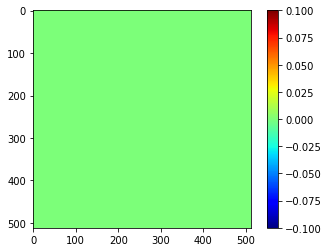

In [10]:
data =read_MHA('/media/kgonzalez/Seagate Backup Plus Drive/Heidi/clear_cell_onco/clear_cell/10024-0011_2003-05-19/1.2.840.113619.2.30.1.1762269721.1947.1053353574.617-CT Post-Contrast Nephrographic/1000113604.mha')

print(data.shape)
print('type is ',type(data))
l = np.argwhere(data > 0.5)
print(l)
print(l.shape)
print(l[0][0])
temp=[]
for x in l:
    temp.append(x[0])

nslice = data[25,:,:]
ldata = np.argwhere(nslice> 0.5)
print(ldata)
print('ldata \n',ldata[0])

rowval=[]
colval=[]
for xx in ldata:
    print(xx)
    rowval.append(xx[0])
    colval.append(xx[1])

print('rowval\n',rowval)
print('colval\n',colval)

plt.figure()
plt.imshow(data[27,:,:],cmap='jet')
plt.colorbar()
return
print(image1)
print('type of image1 is ',type(image1))
print(len(ct_type))
print(len(patient_directories))
print('patient directory 0 \n',patient_directories[0])
print('ct_type #0 is ',ct_type[0])
#print(patient_directories[0])
#print(clear_cell_top_dir)
print('type of clear cell dict is ',type(clear_cell_dict))
print('clear cell pt dir type is ',type(clear_cell_top_dir))
print('clear cell pt dir is ------>\n',clear_cell_top_dir)
print(type(clear_cell_dict))
print('clear cell dict is \n',clear_cell_dict)
image_folder =get_folders(clear_cell_top_dir,clear_cell_dict,image1)
print('image_dict ---->\n',image_dict)
print('single image dict\n',image_dict['10024-0011_2003-05-19'])